In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import display
%matplotlib inline

In [3]:
#Inspeksi Data
books = pd.read_csv('S:/Learning/WORKSPACE/Eksplorasi-Data-Penjualan-Buku-Di-Amazon/bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
#Analisis Data
books.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
data = pd.read_csv('bestsellers with categories.csv')
df = DataFrame(data)

m = df['Reviews'].min()
C = df['User Rating'].mean()

def getWeightedRating(data, m=m, C=C):
    v = data['Reviews']
    R = data['User Rating']
    return (v/(v+m)*R) + (m/(v+m)*C)
    
    df['Weighted Rating'] = df.apply(lambda x: getWeightedRating(x), axis=1)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<AxesSubplot:xlabel='Year', ylabel='User Rating'>

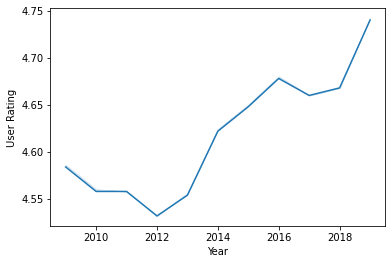

In [6]:
sns.lineplot(data=df, x='Year', y='User Rating', ci=False)

<AxesSubplot:xlabel='Genre', ylabel='count'>

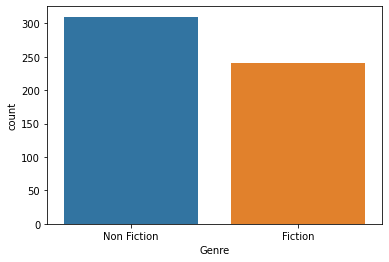

In [7]:
#Analisa Genre
sns.countplot(x=df['Genre'])

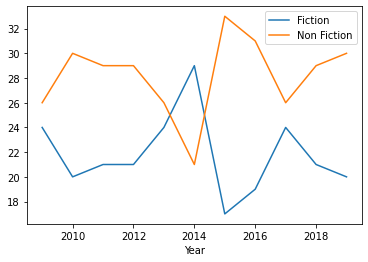

In [ ]:
fiction_count = df[df['Genre'] == 'Fiction'].groupby('Year').size()
nonfiction_count = df[df['Genre'] == 'Non Fiction'].groupby('Year').size()

count_total = pd.DataFrame([fiction_count, nonfiction_count]).transpose()
count_total.columns = ['Fiction', 'Non Fiction']

count_total.plot()

<AxesSubplot:xlabel='Genre', ylabel='User Rating'>

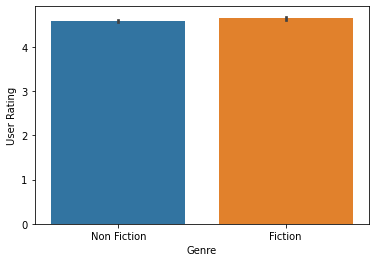

In [8]:
sns.barplot(data=df, x='Genre', y='User Rating')

<AxesSubplot:xlabel='Year', ylabel='User Rating'>

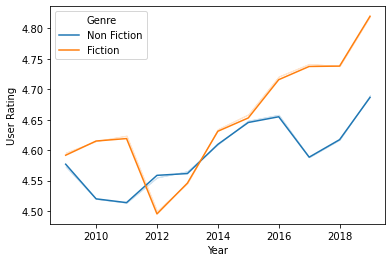

In [9]:
sns.lineplot(data=df, x='Year', y='User Rating', hue='Genre', ci=False)

<AxesSubplot:xlabel='Year', ylabel='Price'>

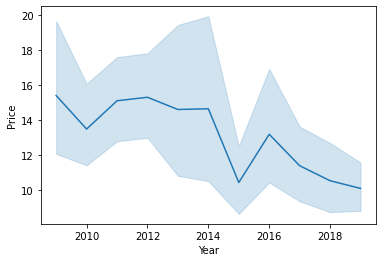

In [10]:
sns.lineplot(data=df, x='Year', y='Price')

<AxesSubplot:xlabel='Year', ylabel='Price'>

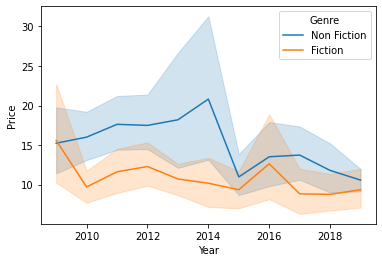

In [11]:
sns.lineplot(data=df, x='Year', y='Price', hue='Genre')

In [12]:
df[df['Price'] == df['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


In [13]:
#Analisa Buku Terbaik
df_fiction = df[df['Genre'] == 'Fiction']
df_nonfiction = df[df['Genre'] == 'Non Fiction']

In [14]:
df[df['User Rating'] == df['User Rating'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


In [15]:
best = []
for i in range(2009, 2020):
    temp = df[df['Year'] == i]
    best.append(temp[temp['User Rating'] == temp['User Rating'].max()])
pd.concat(best, axis=0)

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
160,Have a Little Faith: A True Story,Mitch Albom,4.8,1930,4,2009,Non Fiction
216,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,3828,15,2009,Non Fiction
228,"Mastering the Art of French Cooking, Vol. 2",Julia Child,4.8,2926,27,2009,Non Fiction
...,...,...,...,...,...,...,...
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
489,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2019,Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction


In [16]:
df_nonfiction[df_nonfiction['User Rating'] == df_nonfiction['User Rating'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction


<AxesSubplot:ylabel='Author'>

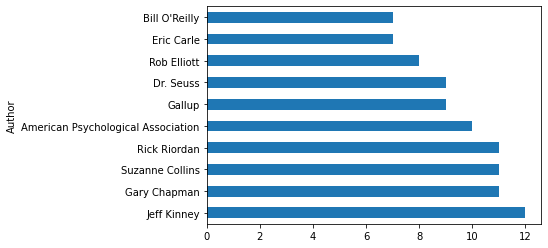

In [17]:
#Analisa Penulis Terbaik
df.groupby('Author').size().sort_values(ascending=False).head(10).plot.barh()